In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
plt.style.use('fivethirtyeight')
from itertools import combinations
from collections import Counter

In [5]:
#Read all sales files using glob
folder_path = '/Users/sageevarug/Downloads/python-projects/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data'
file_list = glob.glob(folder_path + "/*.csv")

df = pd.concat((pd.read_csv(f) for f in file_list))
print(df.head())

  Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301  


Initial preprocessing

In [77]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
Minute                       int64
dtype: object

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) #better than using astype('x')
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [59]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #Takes a bit longer to run
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
dtype: object

In [73]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


Imputation

In [8]:
#Remove rows where val is null
print("Size of df before = ", len(df))
df.dropna(inplace=True)
print("Size of df after = ", len(df))

Size of df before =  186850
Size of df after =  186305


In [76]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Minute              0
dtype: int64

Remove string values from columns

In [11]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Augment data with additional cols

In [13]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
df['Month'] = df['Order Date'].str[0:2].astype('int')

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [16]:
df['Sales'] = df['Quantity Ordered']  * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [55]:
#df['City'] = df['Purchase Address'].str.split(',').str[1]
#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
#or create a function like below:
def get_city(address):
   return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x:get_city(x) + ' ' + get_state(x))    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [61]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


Best month for sales?

In [37]:
df_vis = df.groupby('Month').sum()

In [38]:
df_vis.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


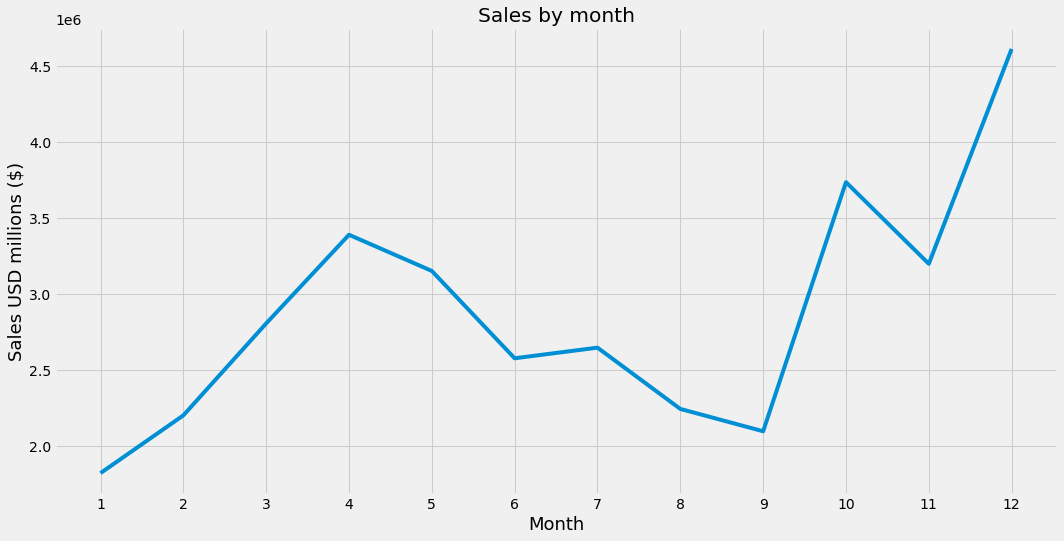

In [39]:
plt.figure(figsize=(16,8))
plt.title('Sales by month')
plt.plot(df_vis['Sales'])
plt.xticks(range(1,13))
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Sales USD millions ($)', fontsize = 18)
plt.show()

Which city had the highest $ of sales?

In [56]:
df_vis_city = df.groupby('City').sum()
df_vis_city.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80


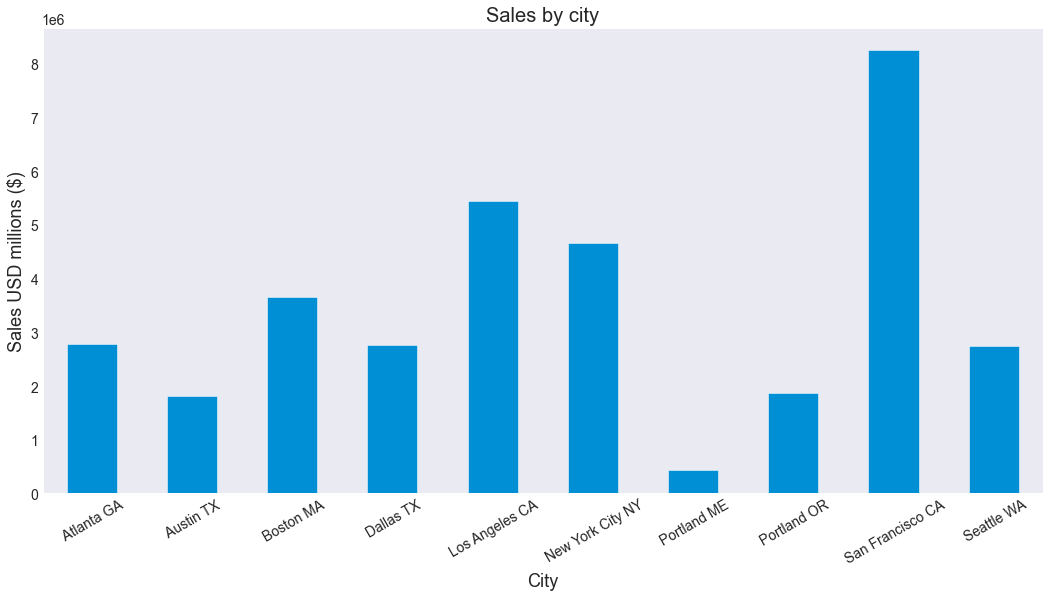

In [57]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
plt.title('Sales by city')
df_vis_city['Sales'].plot(kind = 'bar') # or kind = 'barh' for horizontal bar chart
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.xlabel('City', fontsize = 18)
plt.ylabel('Sales USD millions ($)', fontsize = 18)
plt.show()

In [58]:
# Issue with doing the above: there might be > 1 city with the same name eg: Portland might be in different states
# Therefore I added the get_state function as well

What time should we display ads to maximize likelihood of a customer buying a product?

In [74]:
hours = [hour for hour, df_x in df.groupby('Hour')]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

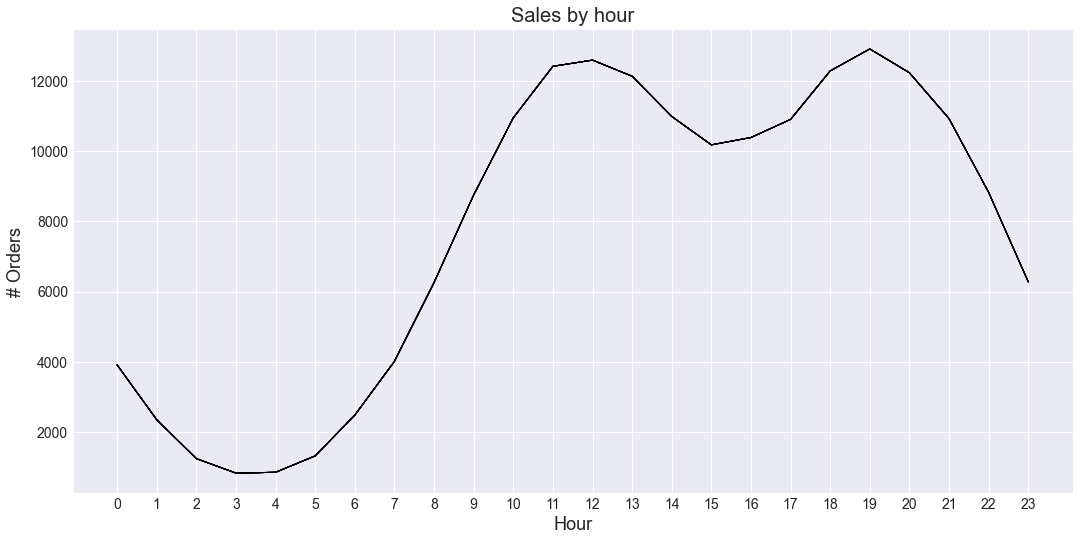

In [93]:
sns.set_style('dark')
plt.figure(figsize=(16,8))
plt.plot(df.groupby(['Hour']).count(), 'k', linewidth = 1)
plt.title('Sales by hour')
plt.xticks(hours)
plt.xlabel('Hour', fontsize = 18)
plt.ylabel('# Orders', fontsize = 18)
plt.grid()
plt.show()

#Best times to place ads: 11 am & 7 pm

What products are most sold together?

In [100]:
#Basically need to get anything with a duplicate order id
dup_df = df[df['Order ID'].duplicated(keep=False)]

dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

dup_df = dup_df[['Order ID', 'Grouped']].drop_duplicates()
dup_df.head()

/var/folders/yy/3c7ftdpd1z19jpf9ch8by99xvrdhxv/T/ipykernel_3117/2572974984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [102]:
count = Counter()

for row in dup_df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sold the most and why?

In [108]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

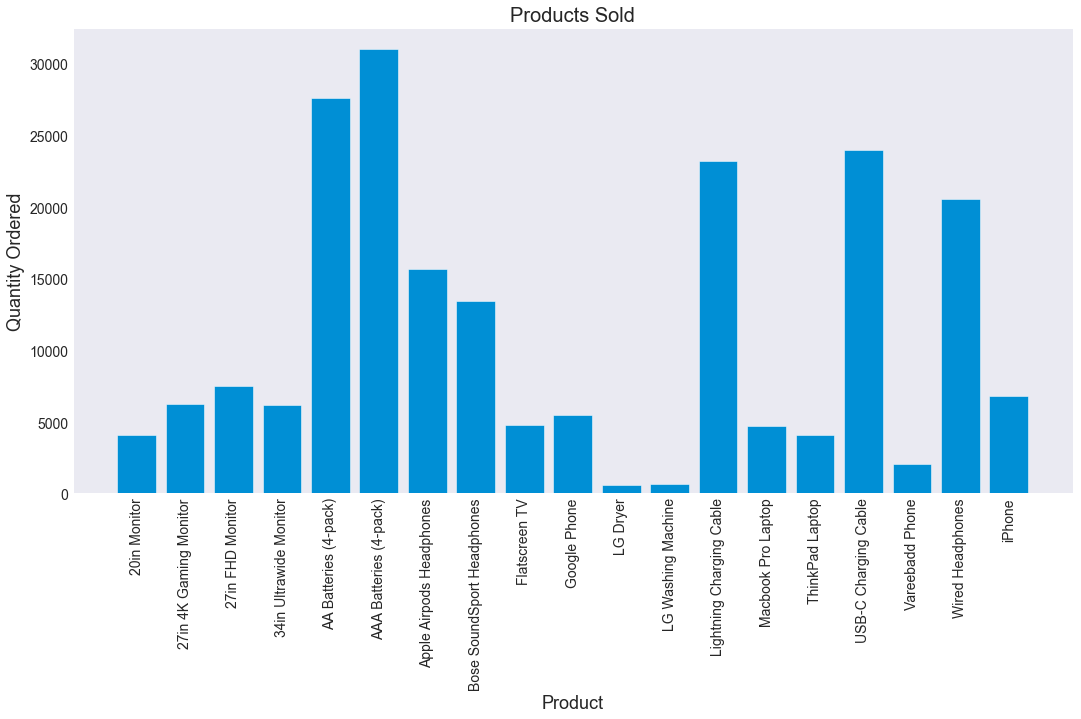

In [113]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
plt.title('Products Sold')
plt.bar(products, quantity_ordered)
plt.xticks(rotation = 90, horizontalalignment = 'center')
plt.xlabel('Product', fontsize = 18)
plt.ylabel('Quantity Ordered', fontsize = 18)
plt.show()

In [116]:
#Overlaying a second Y-axis (Prices) on existing chart
prices = df.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/yy/3c7ftdpd1z19jpf9ch8by99xvrdhxv/T/ipykernel_3117/1826388882.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


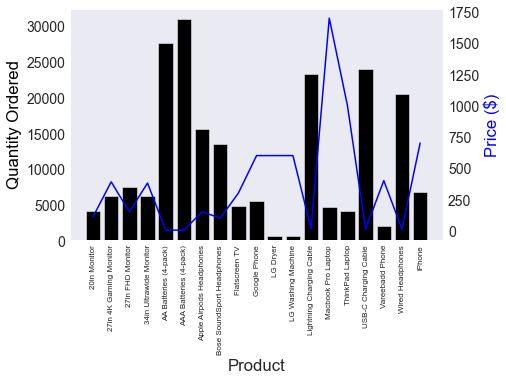

In [128]:

sns.set_style('dark')
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'black')
ax2.plot(products, prices, 'b-', linewidth = 1.5)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color = 'k')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()